In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [8]:
from helpers import load_data

# load dataset
x, y = load_data()

In [12]:
x[build_k_indices(y, 4, 1)]

array([[ 5.77843549,  3.00231147,  2.6237491 ,  5.02131076,  1.86662437,
         3.50706129,  2.74993656,  1.2356871 ,  5.90462294,  1.99281183,
         1.48806201,  5.52606058],
       [ 0.98331219,  0.22618746,  2.87612401,  3.12849893,  5.14749821,
         4.01181111,  1.10949964,  2.49756165,  4.76893584,  6.0308104 ,
         3.25468638,  2.11899928],
       [ 0.1       ,  3.38087384,  4.64274839,  1.61424946,  2.24518674,
         0.60474982,  4.26418602,  3.7594362 ,  4.39037348,  0.47856237,
         4.51656093,  1.36187455],
       [ 3.88562366,  5.65224803,  4.13799857,  4.8951233 ,  6.15699785,
         0.35237491,  5.39987312,  0.73093728,  3.63324875,  2.37137419,
         6.28318531,  0.85712473]])

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [117]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

mean = lambda l: sum(l) / float(len(l))

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    te = []; tr = [];
    
    for idx, ks in enumerate(k_indices):
        test_idx = ks; train_idx = [k_ for i,k_ in enumerate(k_indices) if i!=idx];
        flat_train_idx = [item for sublist in train_idx for item in sublist]
        x_test = x[ks] ; y_test = y[ks]
        x_train = x[flat_train_idx] ; y_train = y[flat_train_idx]
        
        poly_x_train = build_poly(x_train, degree)
        poly_x_test  = build_poly(x_test , degree)

        mse, wstar = ridge_regression(y_train, poly_x_train, lambda_)
        loss_te = compute_mse(y_test, poly_x_test, wstar)
        tr.append(mse); te.append(loss_te)
    return mean(tr), mean(te)

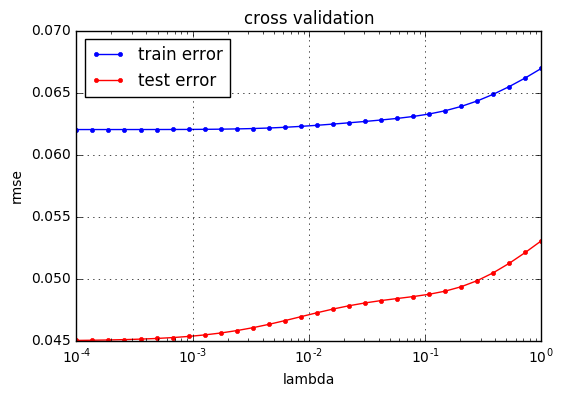

In [118]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    
    x, y = load_data()
    
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []; rmse_te = [];
        
    for lambda_ in lambdas:
        err_tr, err_te = cross_validation(y, x, k_indices, k_fold, lambda_, degree)
        rmse_tr.append(err_tr); rmse_te.append(err_te);
        
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

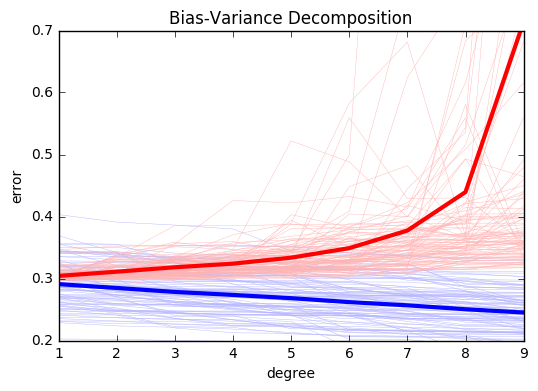

In [135]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T

        x_train, y_train, x_test, y_test = split_data(x, y, ratio_train, seed)

        for d in degrees:
            poly_x_train = build_poly(x_train, d)
            poly_x_test  = build_poly(x_test , d)
            
            mse, w_star = least_squares(np.asarray(y_train),np.asarray(poly_x_train))
            
            rmse_tr[index_seed, d-1] = compute_mse(y_train, poly_x_train, w_star)
            rmse_te[index_seed, d-1] = compute_mse(y_test , poly_x_test , w_star)

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()